In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import pathlib
dataset = "C:/Users/hoime/Desktop/fyp/photos"
#data_dir = tf.keras.utils.get_file('photos', origin=dataset_url, untar=false)
data_dir = pathlib.Path(dataset)
#data_dir = pathlib.Path(dataset)

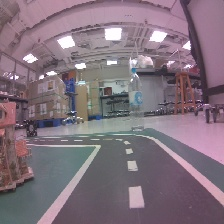

In [4]:
#check images
straight = list(data_dir.glob('straight/*'))
PIL.Image.open(str(straight[0]))

In [5]:
batch_size = 16
img_height = 224
img_width = 224

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 348 files belonging to 9 classes.
Using 279 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 348 files belonging to 9 classes.
Using 69 files for validation.


In [8]:
#check classes
class_names = train_ds.class_names
print(class_names)

['modifyleftmid', 'modifyleftstrong', 'modifyrightmid', 'modifyrightstrong', 'modifystraight', 'straight', 'turnmid', 'turnstrong', 'turnweak']


In [9]:
#check size
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 224, 224, 3)
(16,)


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
normalization_layer = layers.Rescaling(1./255)

In [12]:
#training model
num_classes = len(class_names)

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(9, activation='softmax')
])

In [13]:
#check model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 256)      1024      
 hNormalization)                                                 
                                                        

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
epochs=70
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/70


C:\Users\hoime\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


18/18 [==============================] - 19s 984ms/step - loss: 28.3839 - accuracy: 0.3513 - val_loss: 50134.2344 - val_accuracy: 0.1594
Epoch 2/70
18/18 [==============================] - 20s 1s/step - loss: 4.5734 - accuracy: 0.4588 - val_loss: 9917.8066 - val_accuracy: 0.1594
Epoch 3/70
18/18 [==============================] - 20s 1s/step - loss: 2.2181 - accuracy: 0.5448 - val_loss: 2899.4622 - val_accuracy: 0.1594
Epoch 4/70
18/18 [==============================] - 20s 1s/step - loss: 1.6188 - accuracy: 0.5914 - val_loss: 1365.6898 - val_accuracy: 0.1594
Epoch 5/70
18/18 [==============================] - 20s 1s/step - loss: 1.5062 - accuracy: 0.6201 - val_loss: 524.9589 - val_accuracy: 0.1594
Epoch 6/70
18/18 [==============================] - 20s 1s/step - loss: 1.1211 - accuracy: 0.6129 - val_loss: 273.9594 - val_accuracy: 0.1594
Epoch 7/70
18/18 [==============================] - 20s 1s/step - loss: 1.3386 - accuracy: 0.6022 - val_loss: 205.6543 - val_accuracy: 0.1594
Epoch 8/

18/18 [==============================] - 21s 1s/step - loss: 0.7631 - accuracy: 0.7061 - val_loss: 1.2728 - val_accuracy: 0.6667
Epoch 60/70
18/18 [==============================] - 23s 1s/step - loss: 0.9037 - accuracy: 0.7097 - val_loss: 1.6045 - val_accuracy: 0.5652
Epoch 61/70
18/18 [==============================] - 24s 1s/step - loss: 0.7880 - accuracy: 0.6882 - val_loss: 1.5530 - val_accuracy: 0.6522
Epoch 62/70
18/18 [==============================] - 24s 1s/step - loss: 0.8859 - accuracy: 0.6953 - val_loss: 1.1079 - val_accuracy: 0.7101
Epoch 63/70
18/18 [==============================] - 24s 1s/step - loss: 0.7699 - accuracy: 0.6953 - val_loss: 1.2542 - val_accuracy: 0.6232
Epoch 64/70
18/18 [==============================] - 23s 1s/step - loss: 0.8672 - accuracy: 0.7097 - val_loss: 1.4046 - val_accuracy: 0.6957
Epoch 65/70
18/18 [==============================] - 21s 1s/step - loss: 0.8292 - accuracy: 0.7276 - val_loss: 1.1536 - val_accuracy: 0.7391
Epoch 66/70
18/18 [======

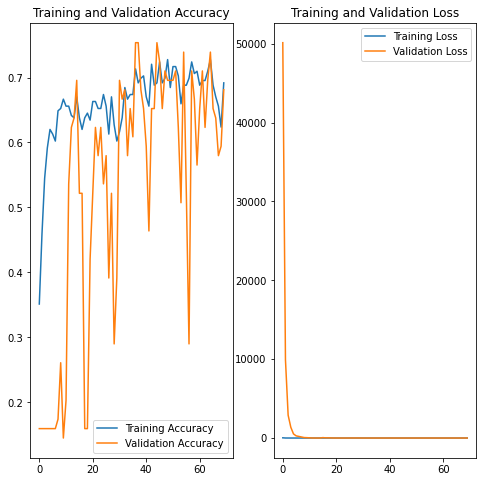

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
model.save(model.h5)

AttributeError: 'Sequential' object has no attribute 'h5'